In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [224]:
bluenile = pd.read_csv('./data/bluenile_new_features.csv')

In [225]:
brilliance = pd.read_csv('./data/forblue_brilliance_new_features.csv')

In [226]:
print(bluenile.shape)
print(brilliance.shape)

(52372, 17)
(21780, 17)


# Regression Set Up

In [227]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import metrics
import scipy.stats as stats

In [228]:
# multifeature columns
mfc = ['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Length to Width', 'Culet',
       'Fluorescence', 'FourC', 'DT Ratio', 'Carat Color',
       'Carat Clarity', 'Shine']
X_blue = bluenile[mfc]
X_brill = brilliance[mfc]
y_blue = bluenile['Price']
y_brill = brilliance['Price']

### Add Poly Features

In [229]:
poly_convert = PolynomialFeatures(degree=2,include_bias=False)
poly_X_blue = poly_convert.fit_transform(X_blue)
poly_X_brill = poly_convert.fit_transform(X_brill)
    
X_blue_train, X_blue_test, y_blue_train, y_blue_test = train_test_split(poly_X_blue, y_blue, test_size=0.20, random_state=11)

### Scale to Blue Nile X Training Set

In [230]:
sts = StandardScaler()
sts.fit(X_blue_train)

StandardScaler()

In [231]:
X_blue_train_scale = sts.transform(X_blue_train)
X_blue_test_scale = sts.transform(X_blue_test)
X_brill_scale = sts.transform(poly_X_brill)

### Lasso Model

In [232]:
lasso = Lasso(alpha = .1)
lasso.fit(X_blue_train_scale,y_blue_train)
yhat_blue_train = lasso.predict(X_blue_train_scale)
yhat_blue_test = lasso.predict(X_blue_test_scale)
yhat_brill = lasso.predict(X_brill_scale)

/Users/lescardone/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5692154127.803766, tolerance: 31394087.404386755
  model = cd_fast.enet_coordinate_descent(


In [233]:
blue_train_r2 = metrics.r2_score(y_blue_train, yhat_blue_train)
blue_test_r2 = metrics.r2_score(y_blue_test, yhat_blue_test)
brill_r2 = metrics.r2_score(y_brill,yhat_brill)

blue_train_rmse = np.sqrt(metrics.mean_squared_error(y_blue_train,yhat_blue_train))
blue_test_rmse = np.sqrt(metrics.mean_squared_error(y_blue_test,yhat_blue_test))
brill_rmse = np.sqrt(metrics.mean_squared_error(y_brill,yhat_brill))
                     
print('Blue Train R2:',blue_train_r2)
print('Blue Test R2:',blue_test_r2)
print('Brill R2:',brill_r2)

print('\nBlue Train RMSE:',blue_train_rmse)
print('Blue Test RMSE:',blue_test_rmse)
print('Brill RMSE:',brill_rmse)

Blue Train R2: 0.9565233745272514
Blue Test R2: 0.9567486695562148
Brill R2: 0.871143588969983

Blue Train RMSE: 570.7690062960379
Blue Test RMSE: 564.2497604260918
Brill RMSE: 1003.6825133850317


In [234]:
brill_res = y_brill - yhat_brill
blue_res = y_blue_test - yhat_blue_test

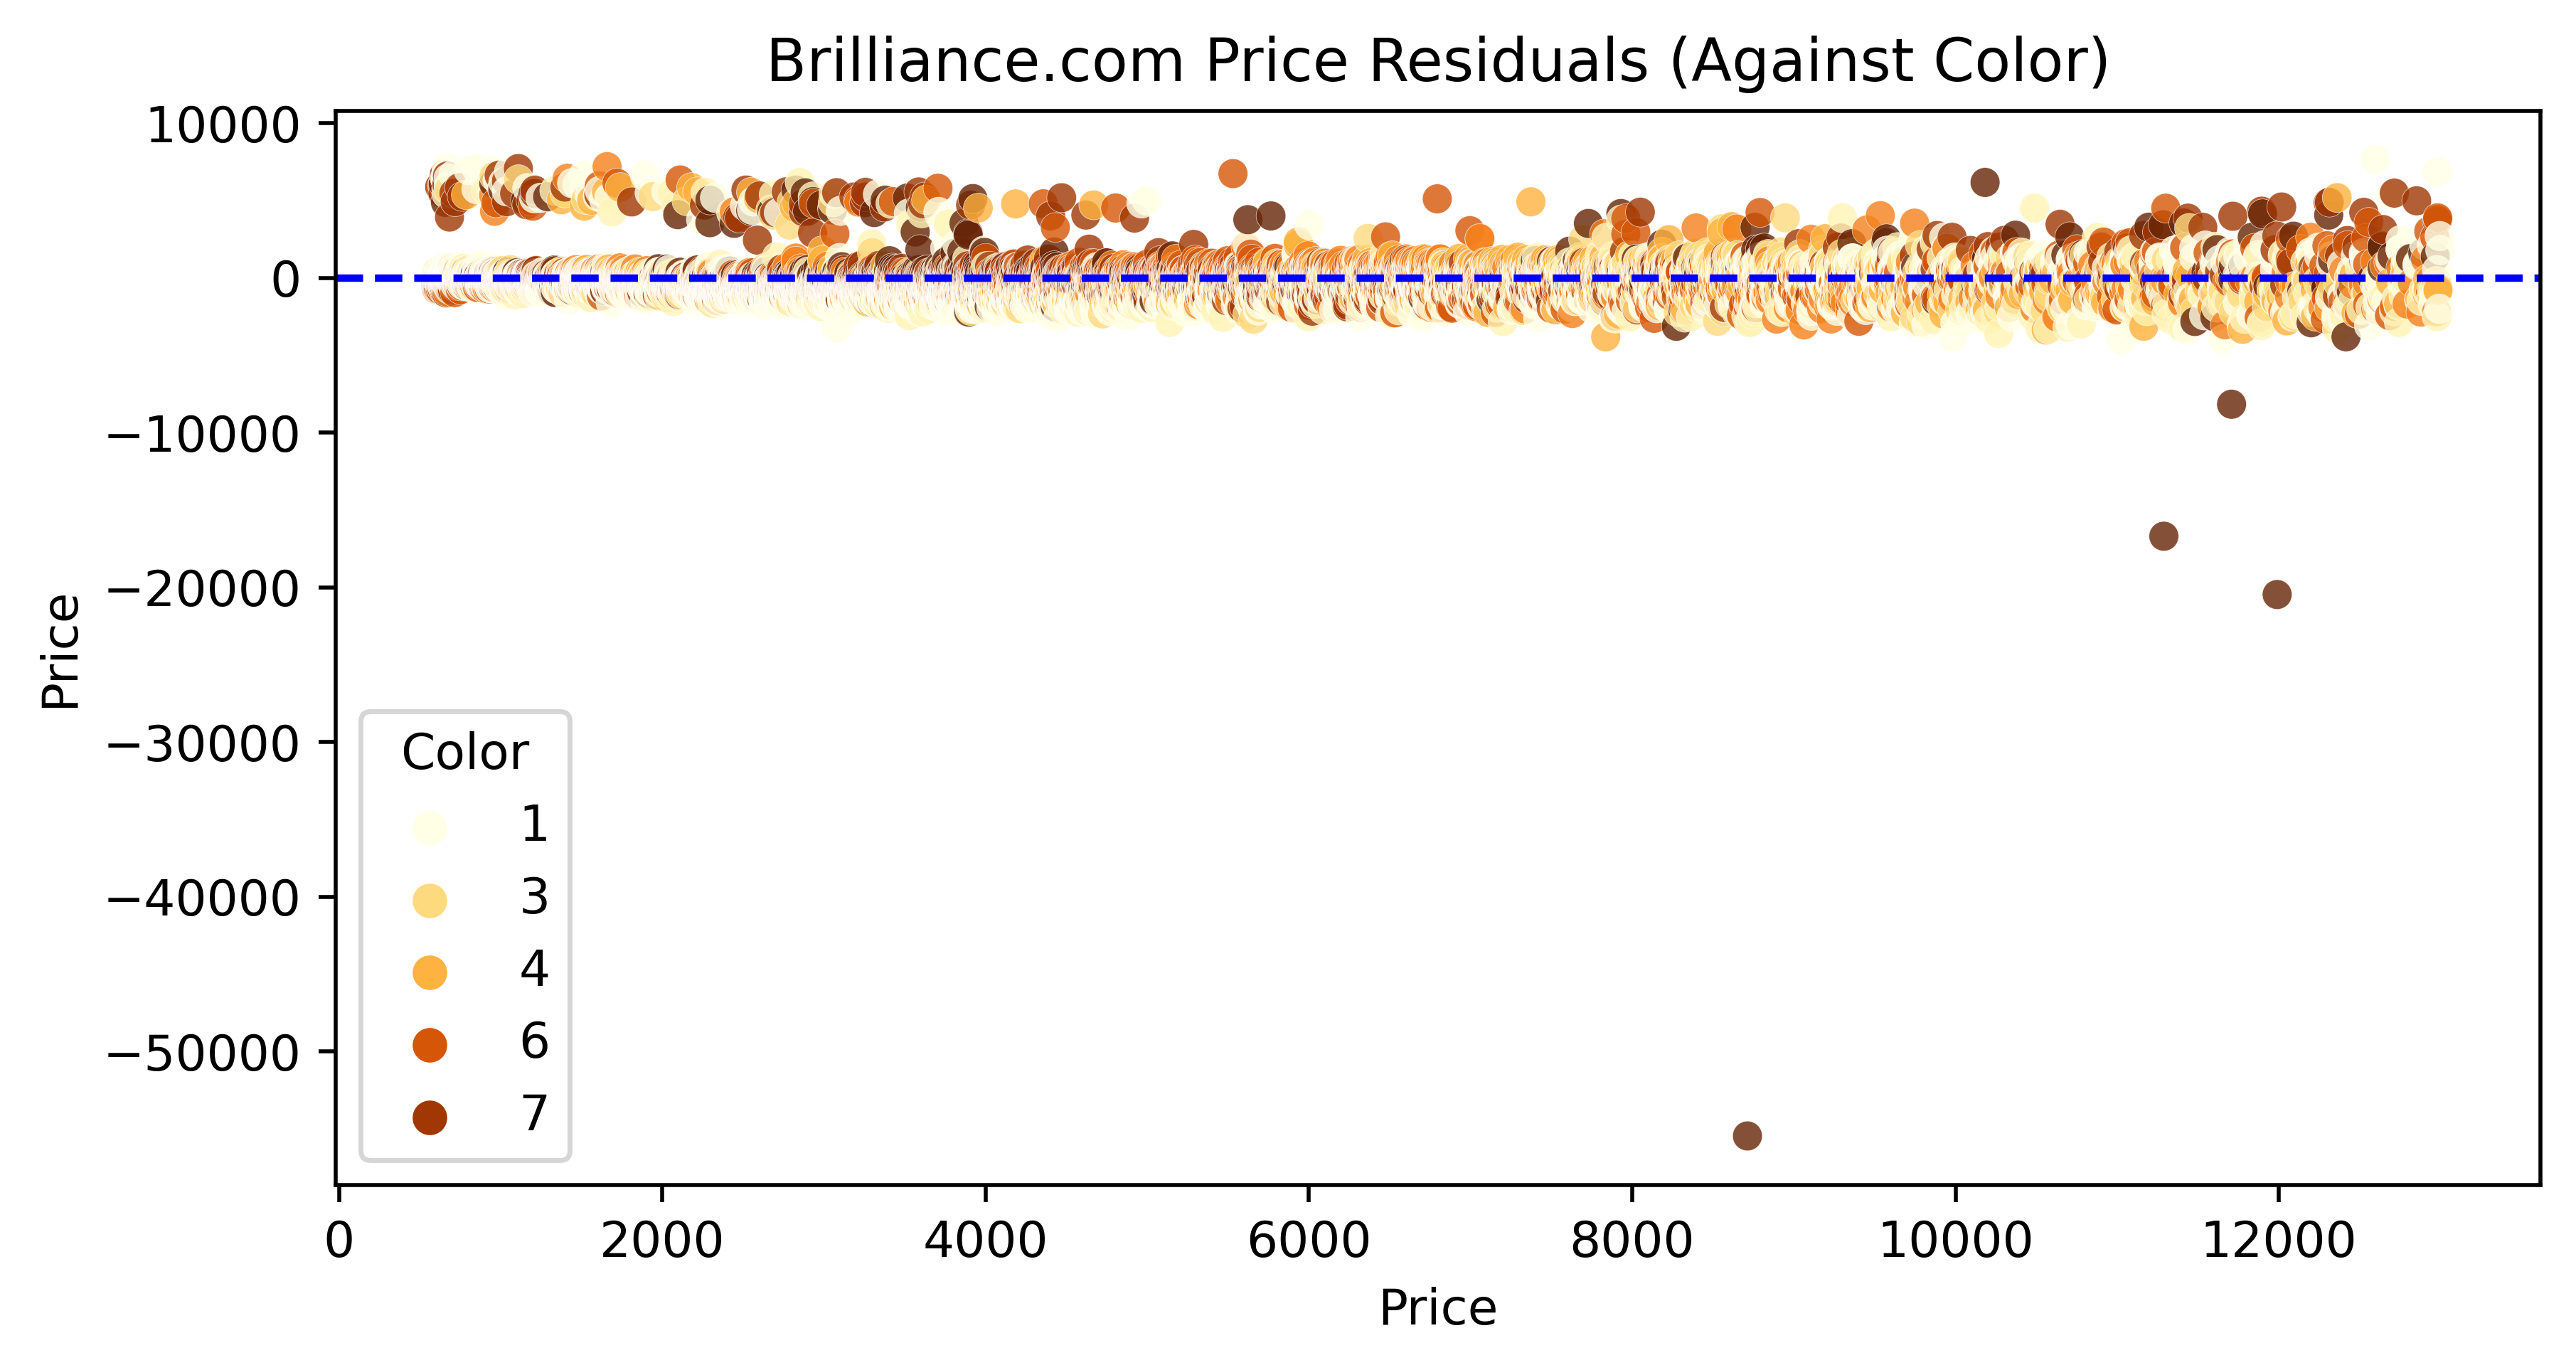

In [235]:
fig = plt.figure(figsize=(8,4),dpi=500)
plt.title('Brilliance.com Price Residuals (Against Color)')
plt.legend(labels=brilliance['Color'])
sns.scatterplot(x=y_brill,y=brill_res,alpha=.8,linewidth=.1,
                hue=brilliance['Color'],palette='YlOrBr')


plt.axhline(y=0,color='b',ls='--');
plt.savefig('./images/brilliance_price_residuals_color.png',bbox_inches='tight')

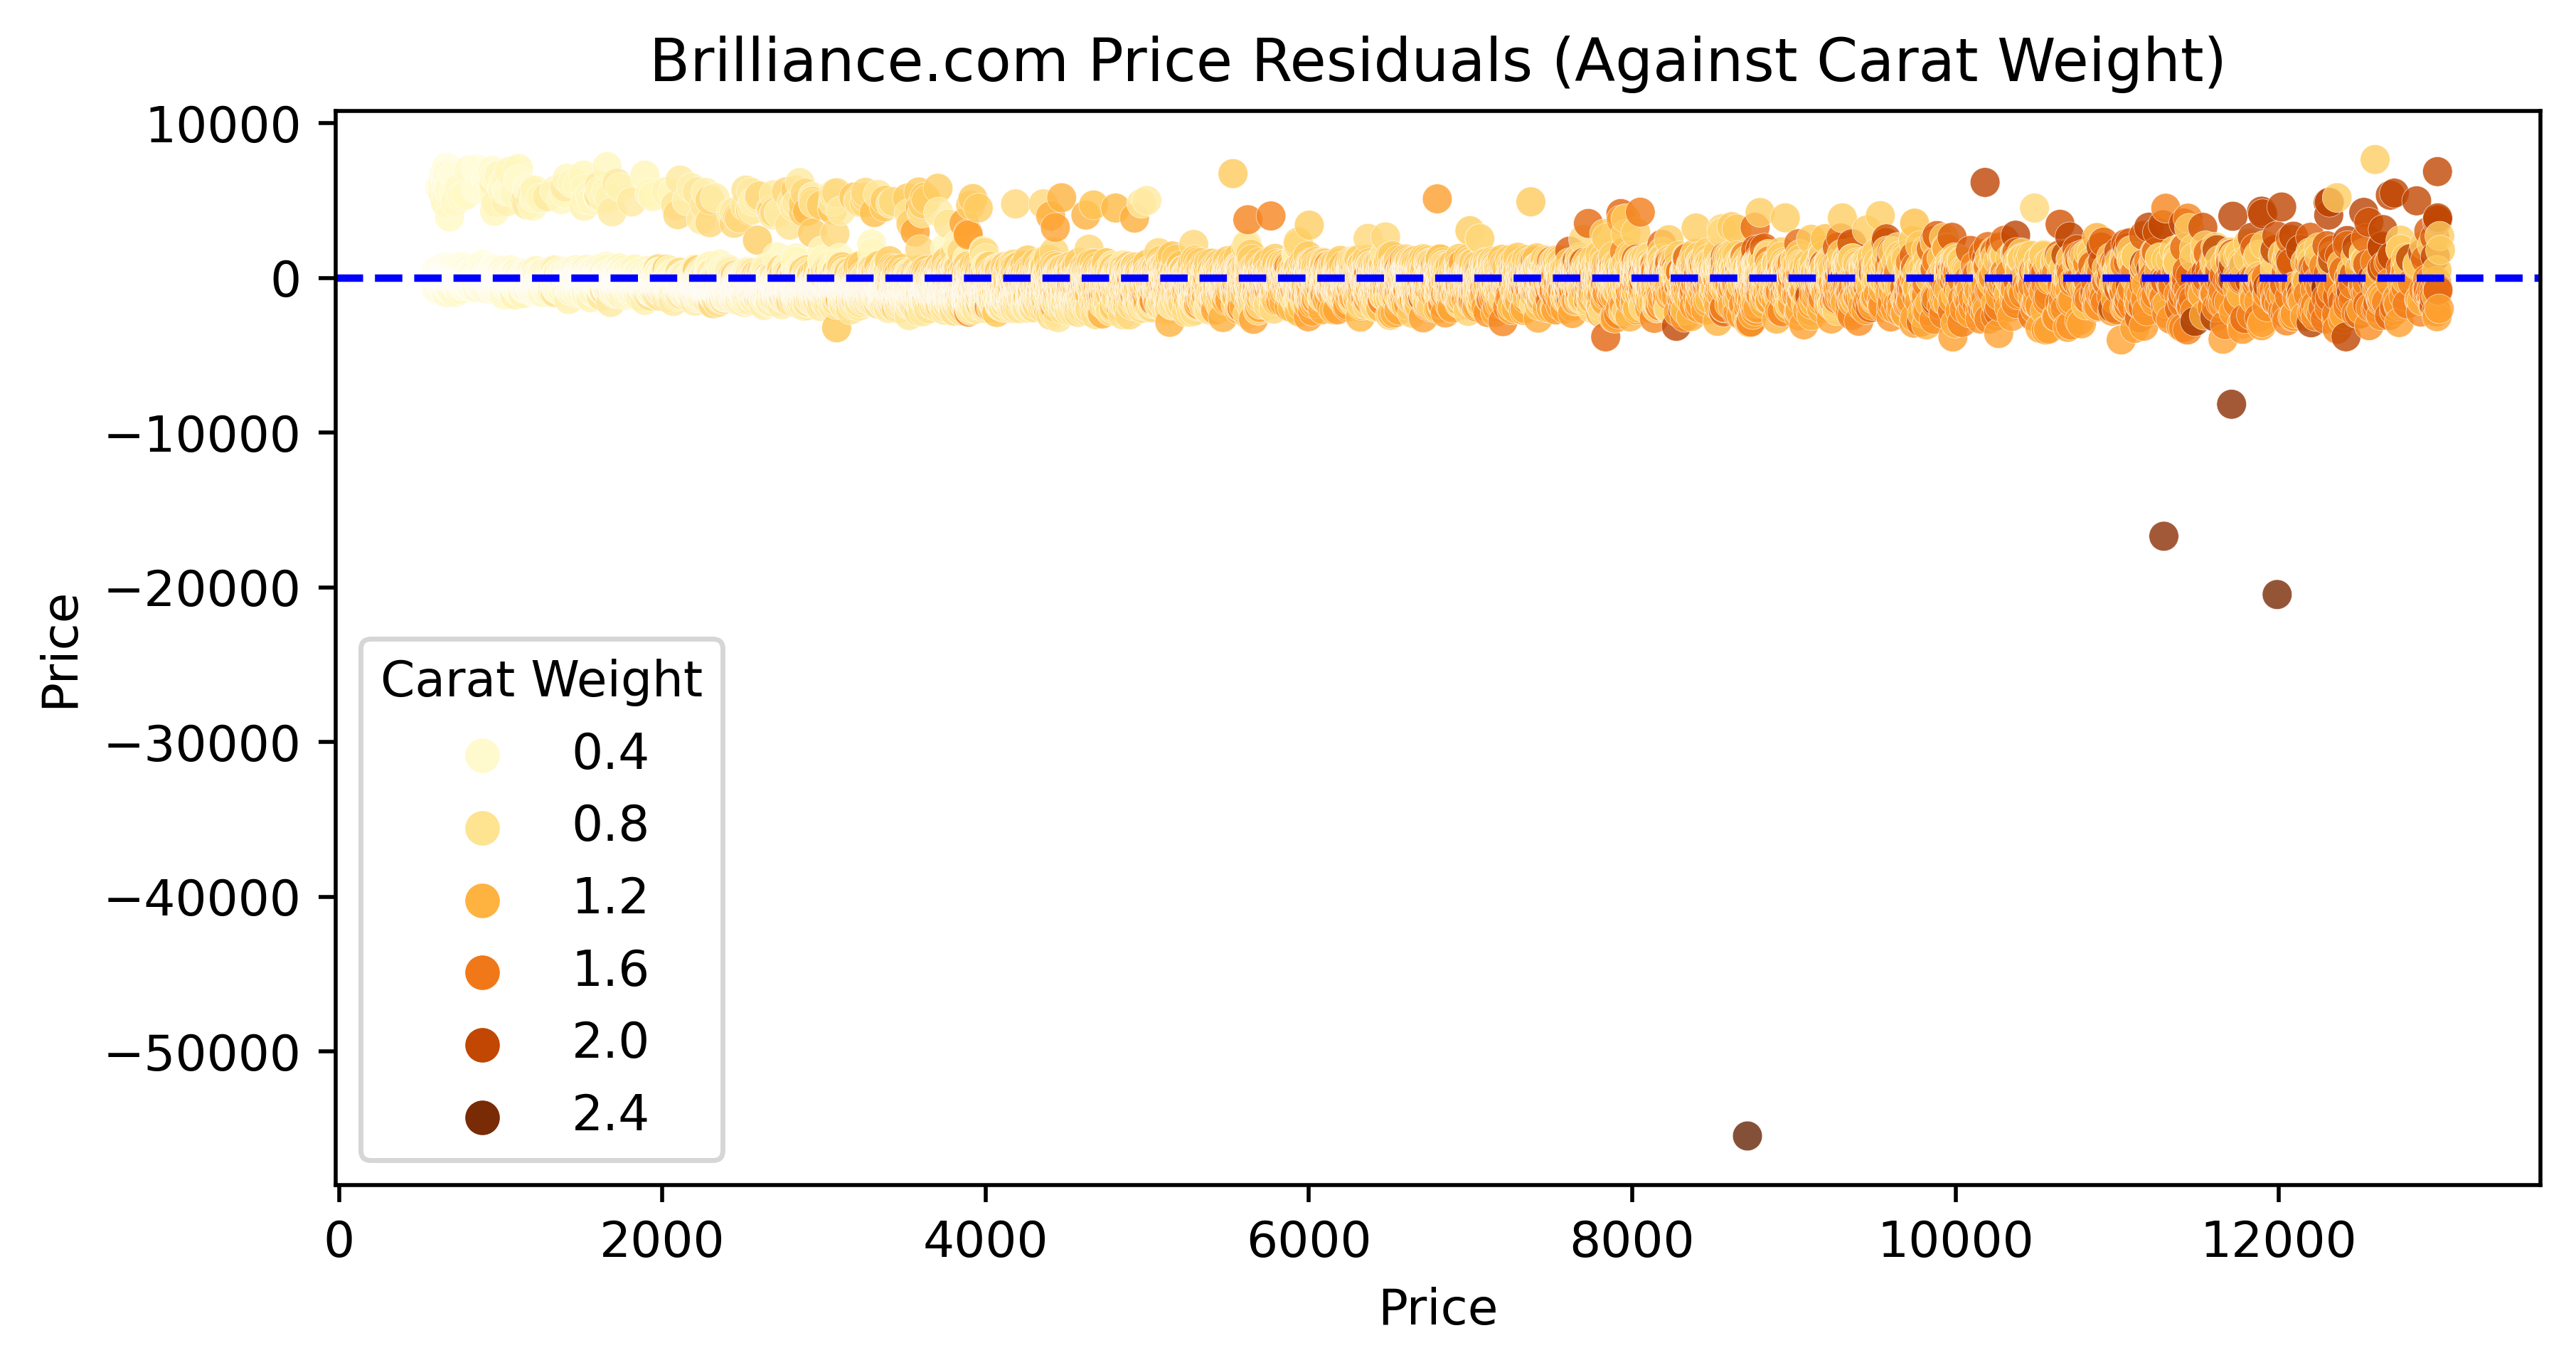

In [236]:
fig = plt.figure(figsize=(8,4),dpi=500)
plt.title('Brilliance.com Price Residuals (Against Carat Weight)')
plt.legend(labels=brilliance['Carat Weight'])
sns.scatterplot(x=y_brill,y=brill_res,
                alpha=.8,linewidth=.1,
                hue=brilliance['Carat Weight'],palette='YlOrBr')


plt.axhline(y=0,color='b',ls='--');
plt.savefig('./images/brilliance_price_residuals_carat.png',bbox_inches='tight')

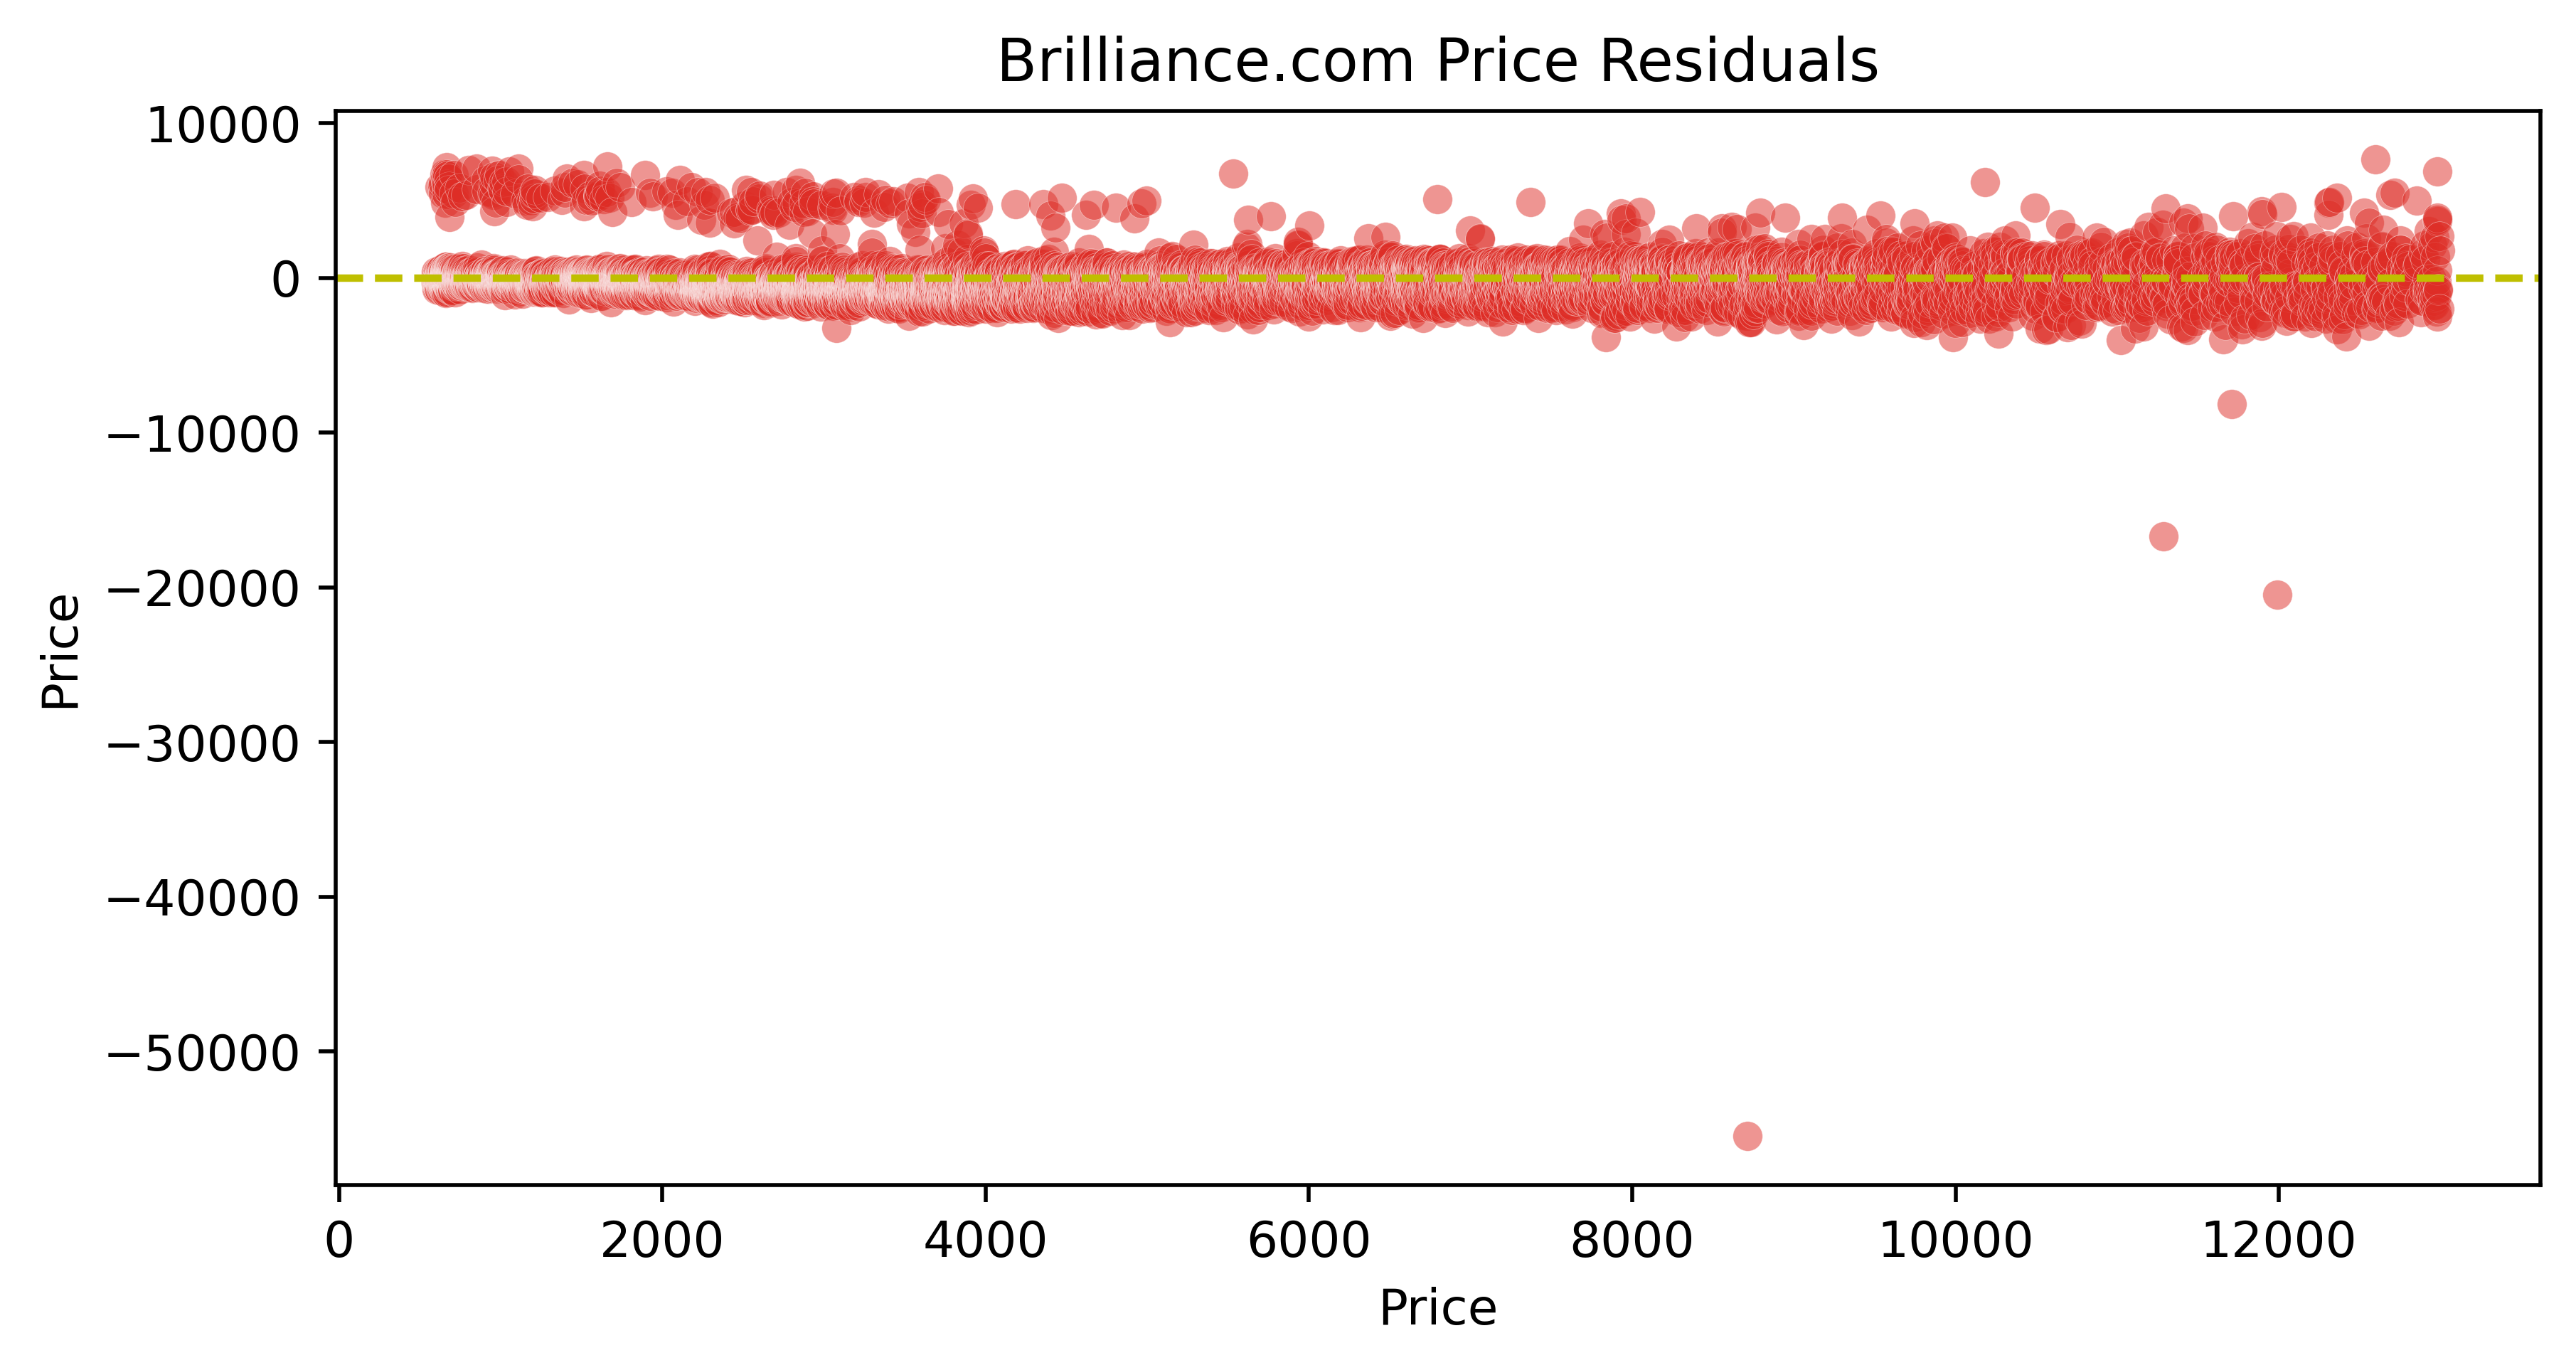

In [237]:
fig = plt.figure(figsize=(8,4),dpi=500)
plt.title('Brilliance.com Price Residuals')
sns.scatterplot(x=y_brill,y=brill_res,
                alpha=.5,linewidth=.1,
                color='#de2d26')


plt.axhline(y=0,color='y',ls='--');
plt.savefig('./images/brilliance_price_residuals.png',bbox_inches='tight')

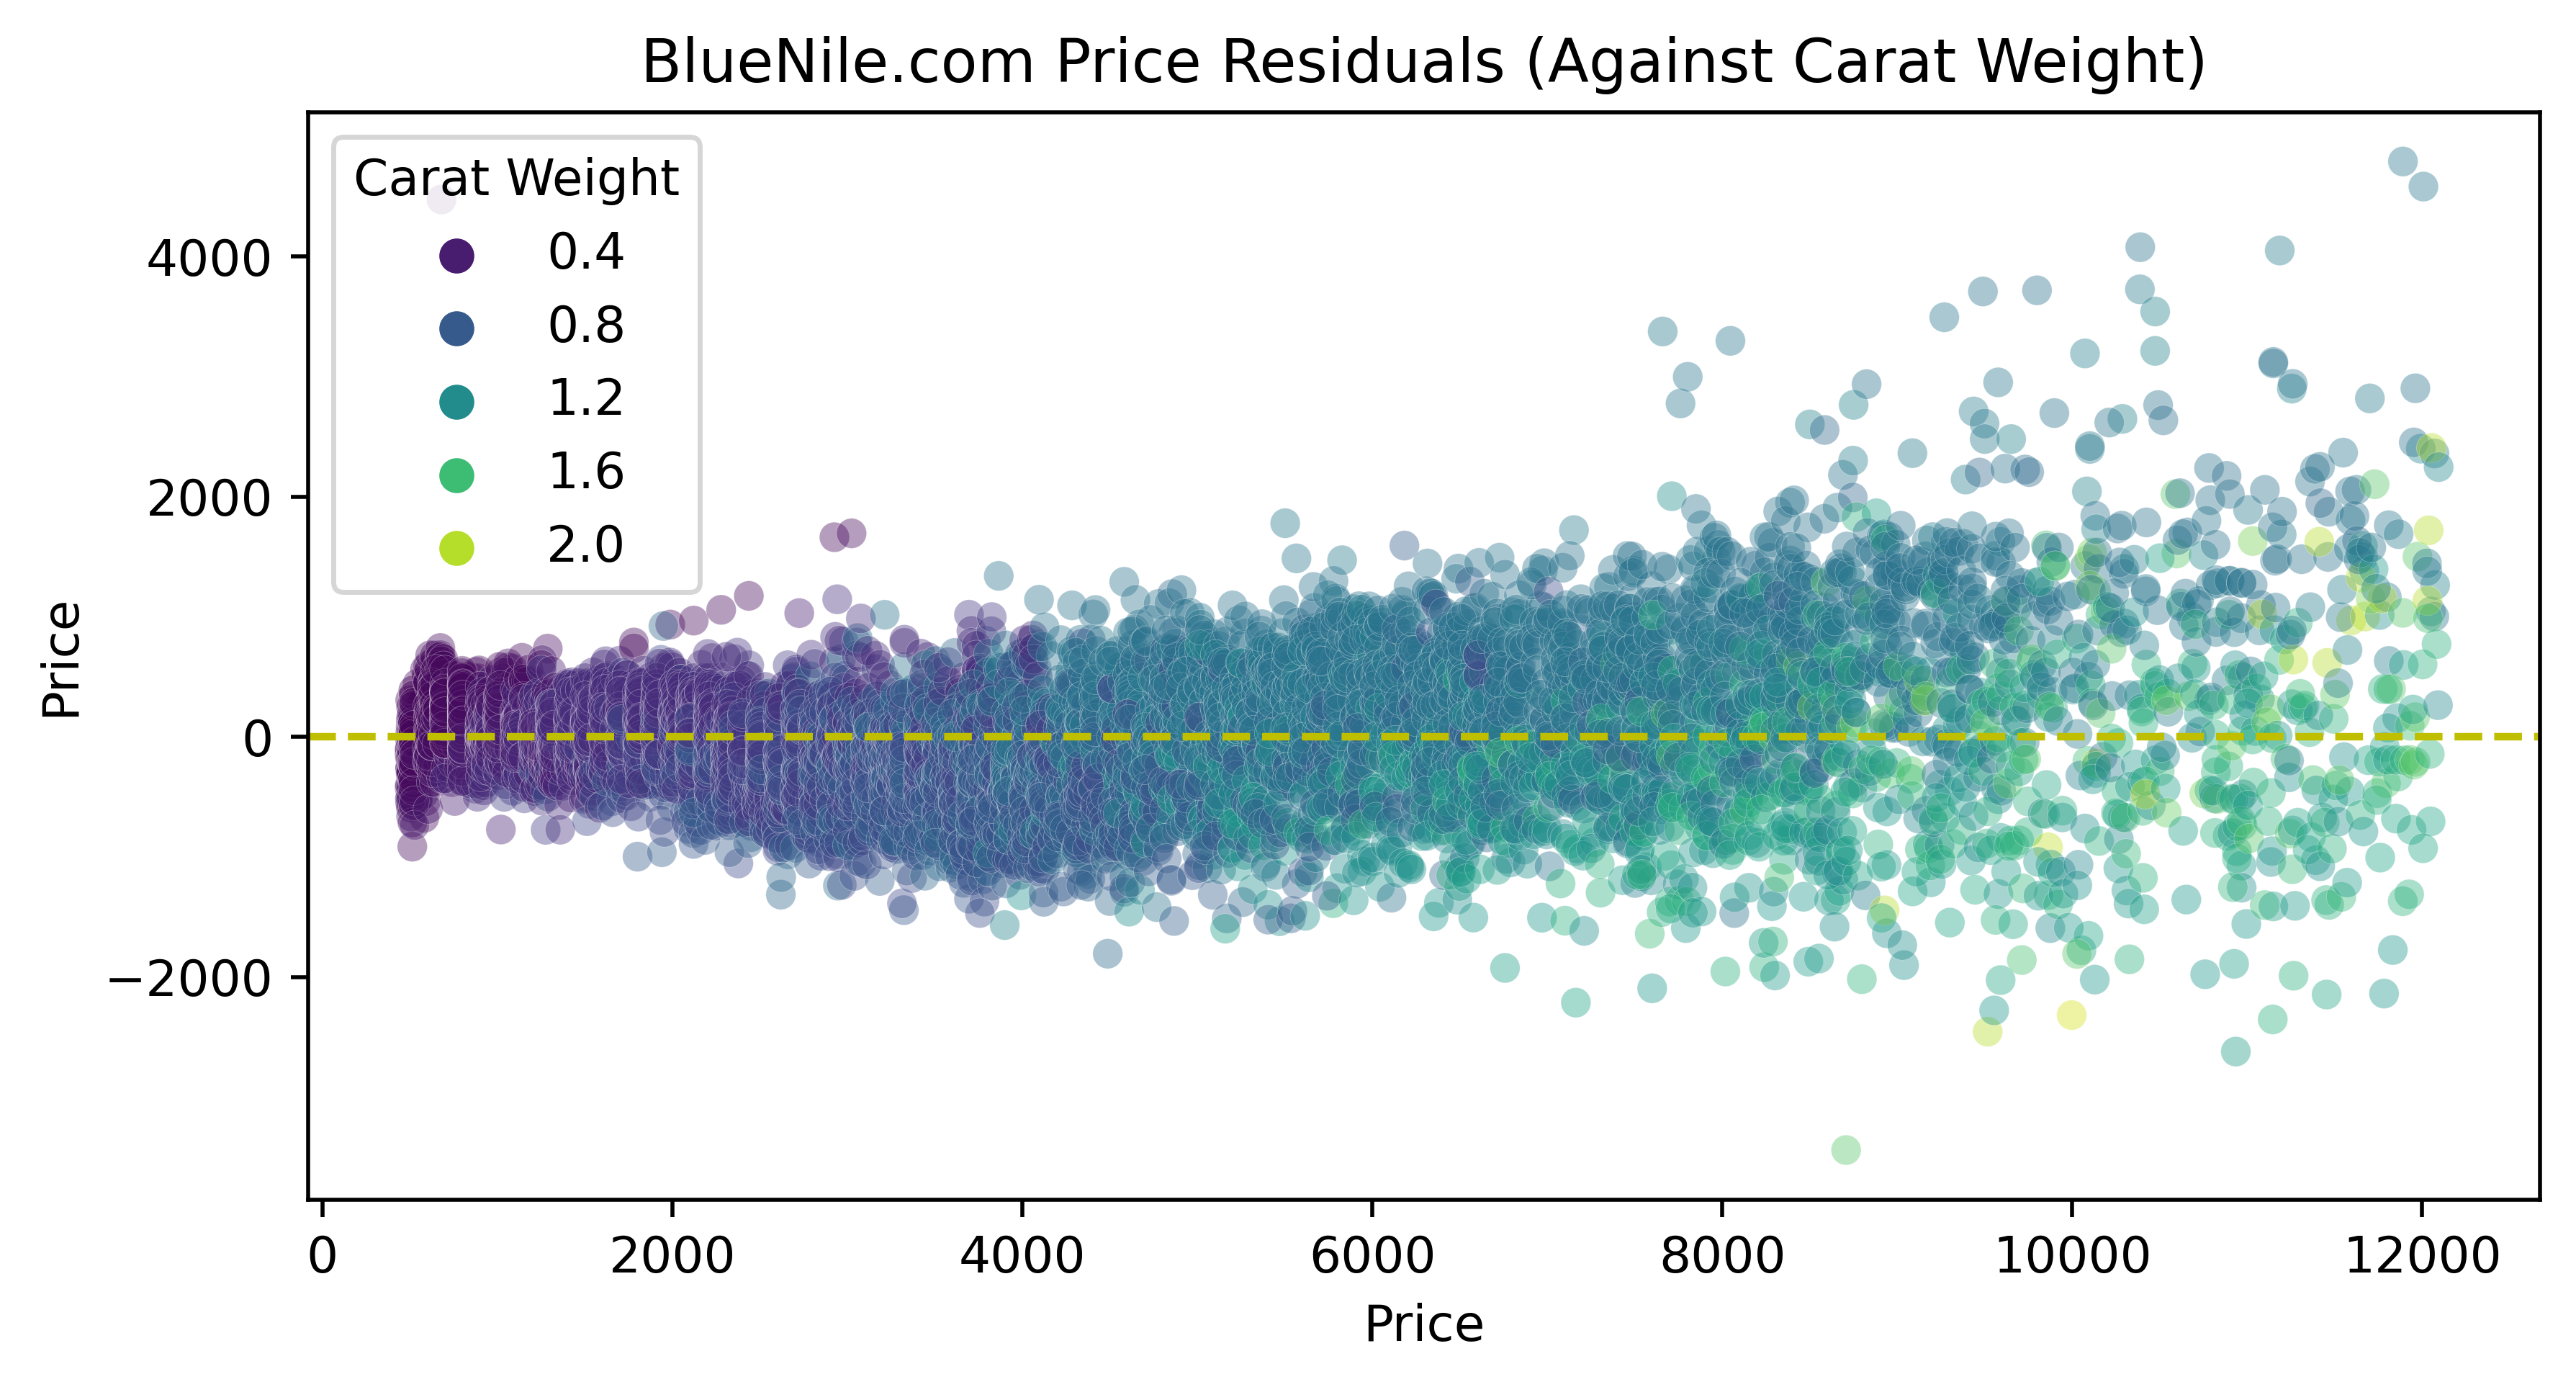

In [238]:
fig = plt.figure(figsize=(8,4),dpi=500)
plt.title('BlueNile.com Price Residuals (Against Carat Weight)')
sns.scatterplot(x=y_blue_test,y=blue_res,
                alpha=.4,linewidth=.1,
                hue=bluenile['Carat Weight'], palette='viridis')
plt.axhline(y=0,color='y',ls='--');
plt.savefig('./images/blue_price_residuals_carat.png',bbox_inches='tight')

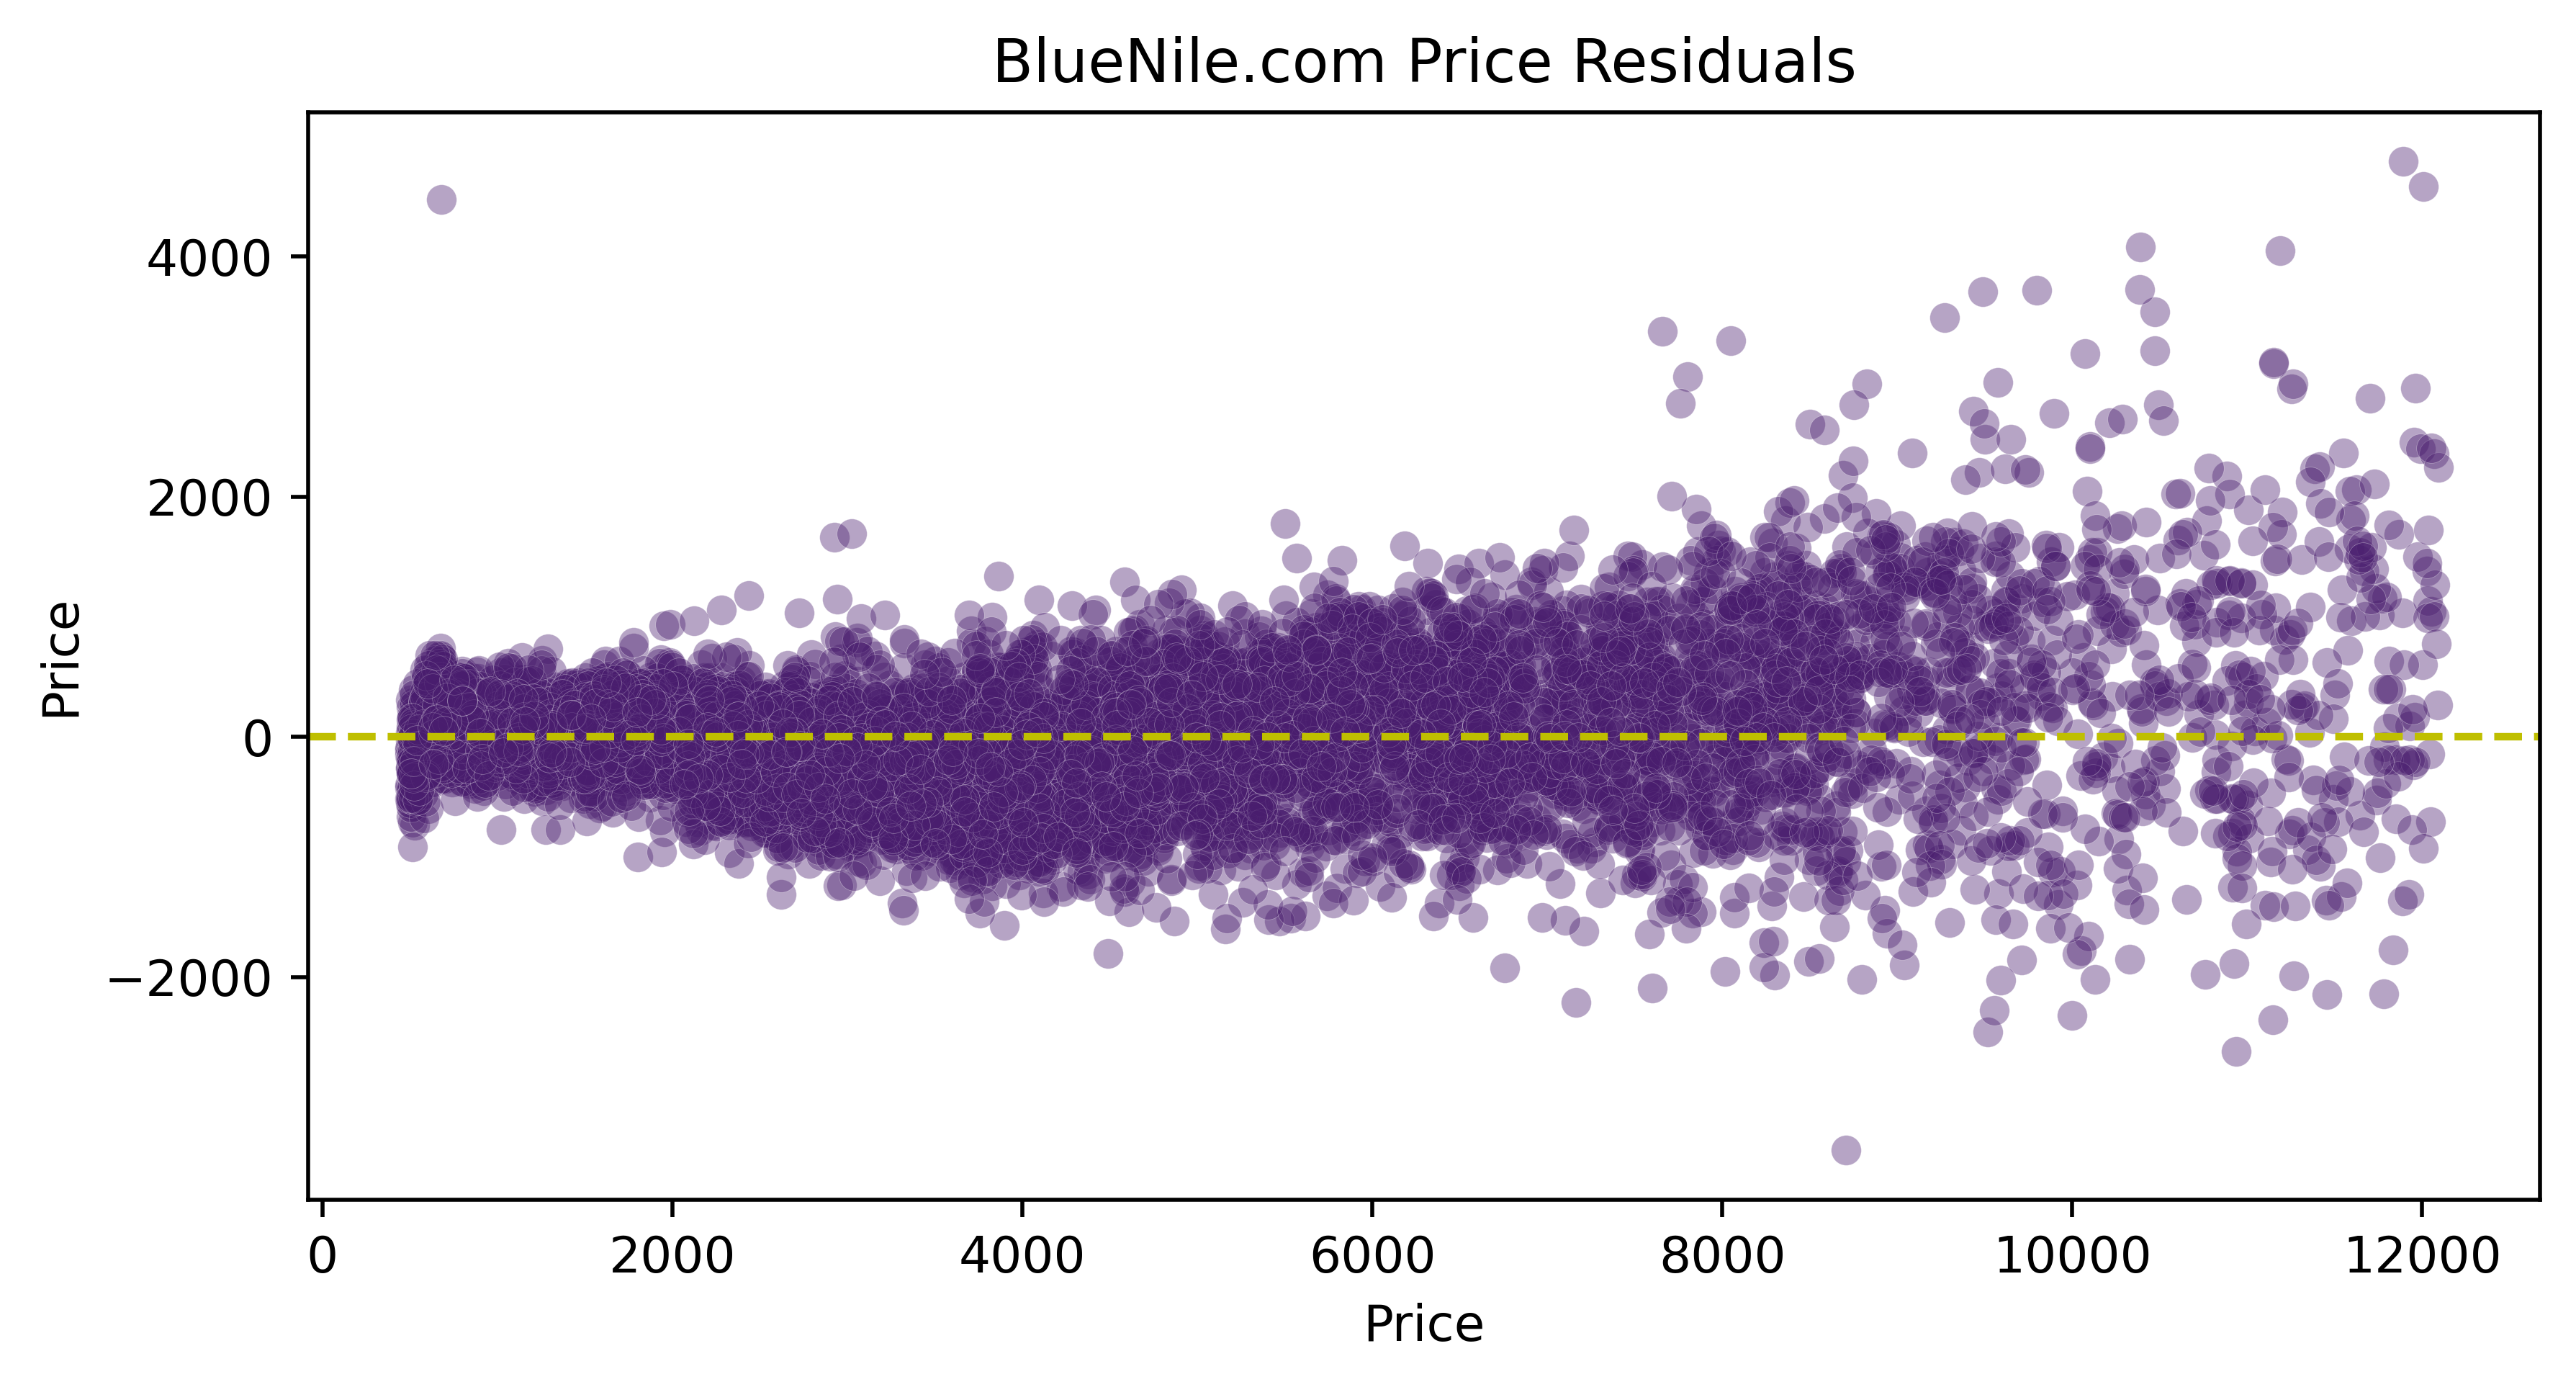

In [239]:
fig = plt.figure(figsize=(8,4),dpi=500)
plt.title('BlueNile.com Price Residuals')
sns.scatterplot(x=y_blue_test,y=blue_res,
                alpha=.4,linewidth=.1,
                color='#491D6E')
plt.axhline(y=0,color='y',ls='--');
plt.savefig('./images/blue_price_residuals.png',bbox_inches='tight')

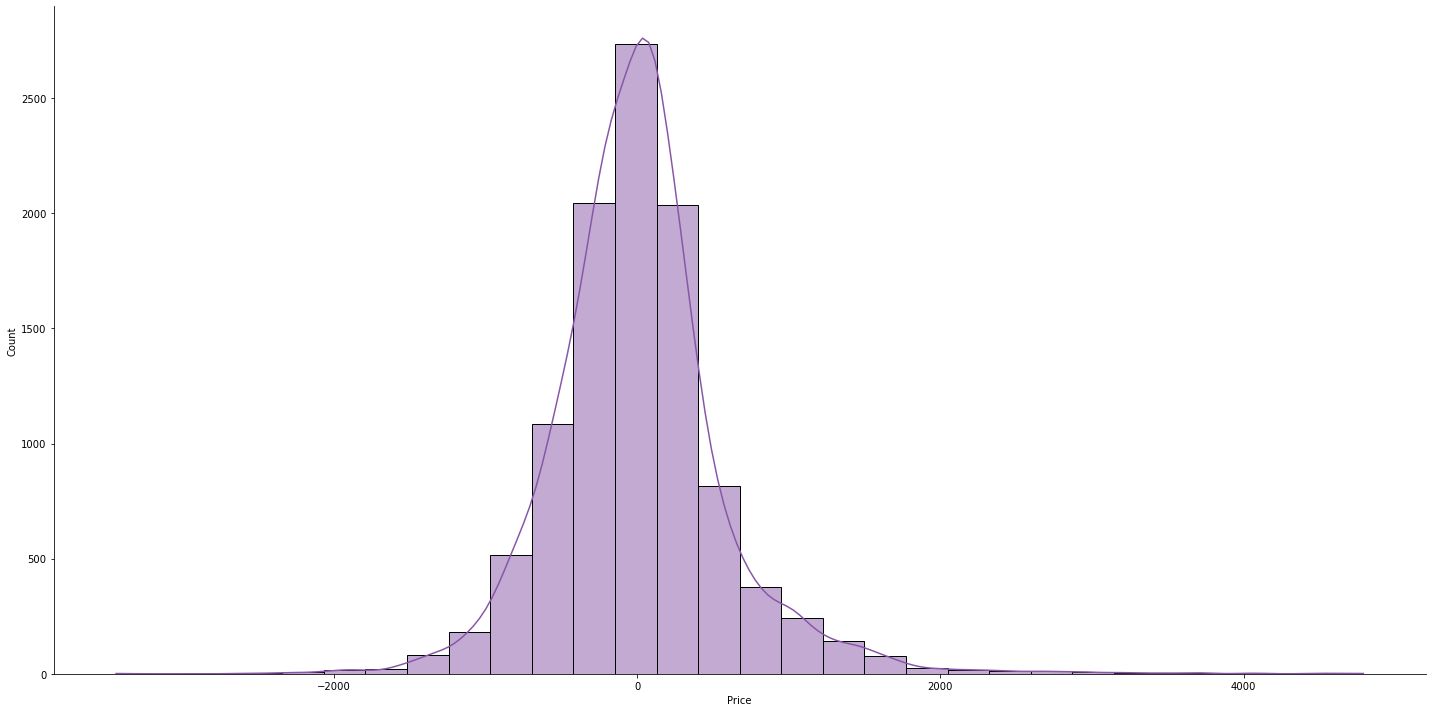

In [240]:
sns.displot(blue_res,bins=30,kde=True,color='#8856a7',aspect=2,height=10)
plt.savefig('./images/blue_residual_hist.png',bbox_inches='tight');

In [241]:
brilliance_res = brilliance.merge(brill_res, left_index = True, right_index = True)
brilliance_res['Price'] = brilliance_res['Price_x']
brilliance_res['Residual'] = brilliance_res['Price_y']
brilliance_res.drop(['Price_x','Price_y'],axis=1,inplace=True)
brilliance_res['Residual Abs'] = brilliance_res['Residual'].map(lambda x: abs(x))
brilliance_res = brilliance_res.sort_values(['Residual Abs'],ascending = False)
brilliance_res_bad = brilliance_res[brilliance_res['Residual Abs'] > 1000]
brilliance_res_overguess = brilliance_res[brilliance_res['Residual'] < -1000]
brilliance_res_underguess = brilliance_res[brilliance_res['Residual'] > 1000]

In [242]:
brilliance_res

Carat Weight  Color  Clarity  Cut  Depth %  Table %  Polish  Symmetry  \
20050          2.51      8        8    1     63.2     56.0       1         1   
21534          2.40      8        7    1     61.1     59.0       1         1   
21346          2.30      8        8    2     63.6     56.0       1         1   
21461          2.29      8        8    1     62.7     58.0       1         1   
21680          1.00      1        6    4     71.6     56.0       1         2   
...             ...    ...      ...  ...      ...      ...     ...       ...   
9589           0.80      7        2    3     64.2     58.0       1         1   
2924           0.52      8        5    1     62.7     57.0       1         1   
10776          1.01      8        7    1     63.0     56.0       1         2   
4097           0.50      2        4    4     66.0     57.0       1         3   
2139           0.40      3        6    1     62.1     58.0       1         1   

       Length to Width  Culet  Fluorescence   FourC  DT Ratio  Carat Color  \
20050             1.00   1.00             2  160.64  1.128571   184.822937   
21534             1.00   1.00             2  134.40  1.035593   147.033389   
21346             1.01   1.00             3  294.40  1.135714   119.428223   
21461             1.01   1.00             2  146.56  1.081034   116.970426   
21680             1.02   1.00             1   24.00  1.278571     1.000000   
...                ...    ...           ...     ...       ...          ...   
9589              1.01   1.00             1   33.60  1.106897     4.743276   
2924              1.01   1.00             1   20.80  1.100000     2.948538   
10776             1.01   1.00             1   56.56  1.125000     8.168097   
4097              1.02   0.01             1   16.00  1.157895     1.414214   
2139              1.01   0.01             2    7.20  1.070690     1.551846   

       Carat Clarity  Shine  Price      Residual  Residual Abs  
20050     184.822937      2   8713 -55461.825149  55461.825149  
21534     106.717415      2  11990 -20462.632728  20462.632728  
21346     119.428223      3  11289 -16694.037016  16694.037016  
21461     116.970426      2  11708  -8163.776998   8163.776998  
21680       6.000000      2  12596   7656.336283   7656.336283  
...              ...    ...    ...           ...           ...  
9589        1.741101      1   2763     -0.218274      0.218274  
2924        2.309215      1   1120     -0.205395      0.205395  
10776       7.137548      2   3054     -0.094351      0.094351  
4097        2.000000      3   1515      0.055403      0.055403  
2139        2.047673      2    955      0.027792      0.027792  

[21780 rows x 19 columns]

In [243]:
yhat_brilliance = pd.Series(yhat_brill,name='yhat')
type(yhat_brilliance)

pandas.core.series.Series

In [244]:
brilliance_res_yhat = brilliance_res.merge(yhat_brilliance, left_index = True, right_index = True)

In [245]:
brilliance_res_yhat.sort_values(['Residual Abs'],ascending = False)

Carat Weight  Color  Clarity  Cut  Depth %  Table %  Polish  Symmetry  \
20050          2.51      8        8    1     63.2     56.0       1         1   
21534          2.40      8        7    1     61.1     59.0       1         1   
21346          2.30      8        8    2     63.6     56.0       1         1   
21461          2.29      8        8    1     62.7     58.0       1         1   
21680          1.00      1        6    4     71.6     56.0       1         2   
...             ...    ...      ...  ...      ...      ...     ...       ...   
9589           0.80      7        2    3     64.2     58.0       1         1   
2924           0.52      8        5    1     62.7     57.0       1         1   
10776          1.01      8        7    1     63.0     56.0       1         2   
4097           0.50      2        4    4     66.0     57.0       1         3   
2139           0.40      3        6    1     62.1     58.0       1         1   

       Length to Width  Culet  Fluorescence   FourC  DT Ratio  Carat Color  \
20050             1.00   1.00             2  160.64  1.128571   184.822937   
21534             1.00   1.00             2  134.40  1.035593   147.033389   
21346             1.01   1.00             3  294.40  1.135714   119.428223   
21461             1.01   1.00             2  146.56  1.081034   116.970426   
21680             1.02   1.00             1   24.00  1.278571     1.000000   
...                ...    ...           ...     ...       ...          ...   
9589              1.01   1.00             1   33.60  1.106897     4.743276   
2924              1.01   1.00             1   20.80  1.100000     2.948538   
10776             1.01   1.00             1   56.56  1.125000     8.168097   
4097              1.02   0.01             1   16.00  1.157895     1.414214   
2139              1.01   0.01             2    7.20  1.070690     1.551846   

       Carat Clarity  Shine  Price      Residual  Residual Abs          yhat  
20050     184.822937      2   8713 -55461.825149  55461.825149  64174.825149  
21534     106.717415      2  11990 -20462.632728  20462.632728  32452.632728  
21346     119.428223      3  11289 -16694.037016  16694.037016  27983.037016  
21461     116.970426      2  11708  -8163.776998   8163.776998  19871.776998  
21680       6.000000      2  12596   7656.336283   7656.336283   4939.663717  
...              ...    ...    ...           ...           ...           ...  
9589        1.741101      1   2763     -0.218274      0.218274   2763.218274  
2924        2.309215      1   1120     -0.205395      0.205395   1120.205395  
10776       7.137548      2   3054     -0.094351      0.094351   3054.094351  
4097        2.000000      3   1515      0.055403      0.055403   1514.944597  
2139        2.047673      2    955      0.027792      0.027792    954.972208  

[21780 rows x 20 columns]

In [246]:
brilliance_res_yhat.sort_values(['Carat Weight'],ascending = False)

Carat Weight  Color  Clarity  Cut  Depth %  Table %  Polish  Symmetry  \
20050          2.51      8        8    1     63.2     56.0       1         1   
21534          2.40      8        7    1     61.1     59.0       1         1   
21346          2.30      8        8    2     63.6     56.0       1         1   
21461          2.29      8        8    1     62.7     58.0       1         1   
21610          2.20      8        7    1     62.7     56.0       1         1   
...             ...    ...      ...  ...      ...      ...     ...       ...   
135            0.23      2        3    1     60.4     57.0       1         1   
1378           0.23      1        2    1     60.3     59.0       1         1   
123            0.23      2        4    2     59.1     60.0       1         1   
185            0.23      1        3    1     61.8     59.0       1         1   
186            0.23      1        3    1     62.8     58.0       1         1   

       Length to Width  Culet  Fluorescence   FourC  DT Ratio  Carat Color  \
20050             1.00   1.00             2  160.64  1.128571   184.822937   
21534             1.00   1.00             2  134.40  1.035593   147.033389   
21346             1.01   1.00             3  294.40  1.135714   119.428223   
21461             1.01   1.00             2  146.56  1.081034   116.970426   
21610             1.01   1.00             1  123.20  1.119643    97.005860   
...                ...    ...           ...     ...       ...          ...   
135               1.01   0.01             2    1.38  1.059649     1.172835   
1378              1.00   1.00             1    0.46  1.022034     1.000000   
123               1.00   0.01             1    3.68  0.985000     1.172835   
185               1.01   1.00             1    0.69  1.047458     1.000000   
186               1.01   1.00             1    0.69  1.082759     1.000000   

       Carat Clarity  Shine  Price      Residual  Residual Abs          yhat  
20050     184.822937      2   8713 -55461.825149  55461.825149  64174.825149  
21534     106.717415      2  11990 -20462.632728  20462.632728  32452.632728  
21346     119.428223      3  11289 -16694.037016  16694.037016  27983.037016  
21461     116.970426      2  11708  -8163.776998   8163.776998  19871.776998  
21610      72.312885      1  12291   -655.348905    655.348905  12946.348905  
...              ...    ...    ...           ...           ...           ...  
135         1.287472      2    629    171.661626    171.661626    457.338374  
1378        1.172835      1    745    -37.396600     37.396600    782.396600  
123         1.375542      1    626    486.810295    486.810295    139.189705  
185         1.287472      1    640    164.063988    164.063988    475.936012  
186         1.287472      1    640    228.988692    228.988692    411.011308  

[21780 rows x 20 columns]

In [247]:
bluenile.sort_values(['Carat Weight'],ascending=False)

Carat Weight  Color  Clarity  Cut  Depth %  Table %  Polish  Symmetry  \
52341          2.22      7        8    2     62.5     58.0       1         1   
52274          2.21      8        7    2     61.6     58.0       1         1   
51034          2.11      8        8    2     62.2     59.0       1         1   
51026          2.10      8        8    2     62.6     57.0       1         1   
50322          2.09      8        7    2     62.9     56.0       1         1   
...             ...    ...      ...  ...      ...      ...     ...       ...   
36             0.25      5        5    2     62.2     59.0       1         1   
35             0.25      5        5    2     62.4     56.0       1         1   
34             0.25      5        5    2     61.3     59.0       1         1   
33             0.25      5        5    2     62.3     57.0       1         1   
255            0.25      2        4    2     61.6     56.0       1         1   

       Length to Width  Culet  Fluorescence  Price   FourC  DT Ratio  \
52341             1.00    1.0           2.0  12001  248.64  1.077586   
52274             1.00    1.0           3.0  11910  247.52  1.062069   
51034             1.00    1.0           1.0  10679  270.08  1.054237   
51026             1.00    1.0           2.0  10637  268.80  1.098246   
50322             1.00    1.0           3.0   9997  234.08  1.123214   
...                ...    ...           ...    ...     ...       ...   
36                1.00    1.0           1.0    582   12.50  1.054237   
35                1.00    1.0           1.0    582   12.50  1.114286   
34                1.01    1.0           1.0    582   12.50  1.038983   
33                1.01    1.0           1.0    582   12.50  1.092982   
255               1.00    1.0           1.0    546    4.00  1.100000   

       Carat Color  Carat Clarity  Shine  
52341    75.182653     101.125288    2.0  
52274    99.044160      73.733809    3.0  
51034    80.448856      80.448856    1.0  
51026    78.793242      78.793242    2.0  
50322    77.171701      58.378765    3.0  
...            ...            ...    ...  
36        1.495349       1.495349    1.0  
35        1.495349       1.495349    1.0  
34        1.495349       1.495349    1.0  
33        1.495349       1.495349    1.0  
255       1.189207       1.414214    1.0  

[52372 rows x 17 columns]